In [29]:
import numpy as np
np.set_printoptions(threshold=np.inf)

# Function Definitions

In [7]:
from orbit_generation_testing.reader import *
from orbit_generation_testing.visualize import *
from orbit_generation_testing.stats import *

In [6]:
mat_data= get_example_mat_data()
mat_data.shape

(300, 6, 200)

In [8]:
h5_data= get_example_h5_data()
h5_data.shape

(36071, 7, 7500)

In [25]:
h5_data[0][1][0:4]

array([0.94099979, 0.94099829, 0.94099379, 0.94098629])

In [26]:
example = select_and_remove(h5_data, [1,2,3,4,5])

In [27]:
example.shape

(5, 6, 7500)

In [ ]:
example[0][0][0],example[0][1][0],example[0][2][0]

In [43]:
def get_spatial_coordinates(data, n_orbit, time_instant):
    """
    Fetches the spatial coordinates for a specific orbit and time instant.

    :param data: numpy.ndarray, shape (num_orbits, 6, num_time_points), containing orbit data.
    :param n_orbit: int, index of the orbit.
    :param time_instant: int, specific time instant to fetch coordinates for.
    :returns: tuple, spatial coordinates (posx, posy, posz).
    """
    if n_orbit < 0 or n_orbit >= data.shape[0] or time_instant < 0 or time_instant >= data.shape[2]:
        raise ValueError("Orbit index or time instant is out of range.")

    # Adjusted indices to match the shape of the data
    return data[n_orbit, 0:3, time_instant]


In [44]:
get_spatial_coordinates(example, 1, 0)

array([9.42076045e-01, 6.95660390e-24, 5.07729457e-01])

In [45]:
print(example.shape)
get_spatial_coordinates(example, 1, 1499)

(5, 6, 7500)


array([0.93819333, 0.01599059, 0.50798945])

In [46]:
get_spatial_coordinates(example, 1, 2999)

array([-1.16803413, -1.19945607, -0.85093444])

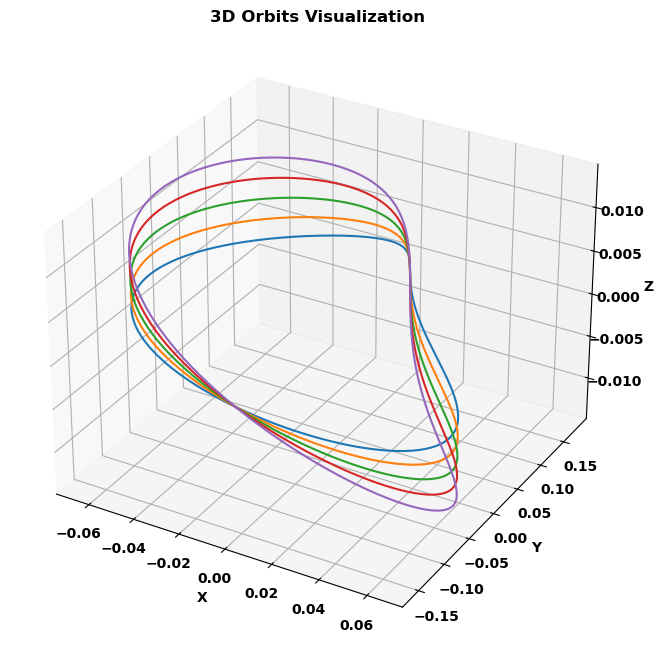

In [47]:
visualize_orbits_static(mat_data, orbit_indices= [1,2,3,4,5])

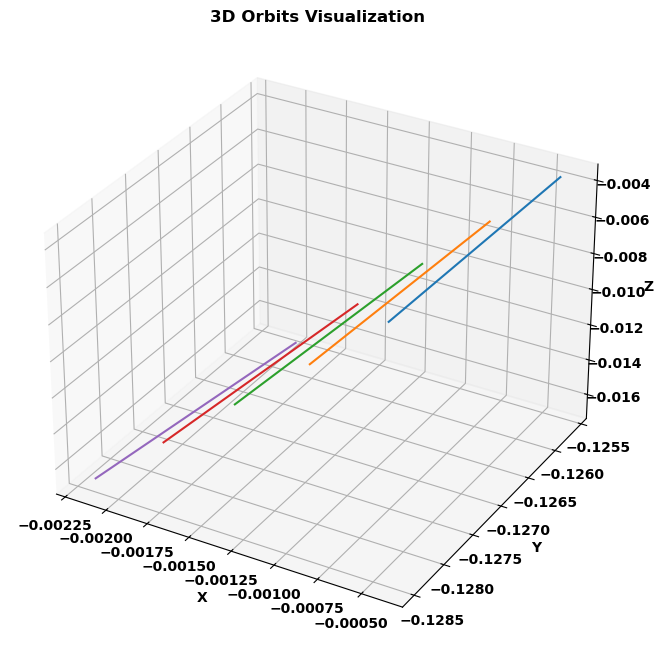

In [23]:
visualize_orbits_static(example, orbit_indices= [1,2,3,4,5])

In [13]:
visualize_dynamic_orbits_html(example)

Visualization saved to orbits.html


In [31]:
#| export
def visualize_orbits_with_multiple_time_instants_highlighted(data, time_instants, orbit_indices=None, show_legend=False):
    """
    Visualizes orbits and highlights specified time instants for every orbit in orbit_indices.

    :param data: numpy.ndarray, shape (num_time_points, 6, num_orbits), containing orbit data.
    :param time_instants: list[int], time instants to highlight across selected orbits.
    :param orbit_indices: Optional[list], indices of the orbits to visualize and highlight. If None, uses all orbits.
    :param show_legend: Optional[bool], indicates whether to show the legend.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    if orbit_indices is None:
        orbit_indices = range(data.shape[2])

    # Validate time instants
    for time_instant in time_instants:
        if time_instant < 0 or time_instant >= data.shape[0]:
            raise ValueError(f"Time instant {time_instant} is out of range.")

    # Plot all requested orbits
    for index in orbit_indices:
        if index < 0 or index >= data.shape[2]:
            print(f"Orbit index {index} is out of range.")
            continue

        X = data[:, 0, index]  # X coordinates
        Y = data[:, 1, index]  # Y coordinates
        Z = data[:, 2, index]  # Z coordinates
        ax.plot(X, Y, Z, label=f'Orbit {index}', alpha=0.5)  # Reduced alpha to emphasize highlights

        # Highlight the specified time instants for each orbit
        for time_instant in time_instants:
            posx, posy, posz = data[time_instant, 0:3, index]
            ax.scatter(posx, posy, posz, color='red', s=100, zorder=5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('3D Orbits Visualization with Multiple Time Instant Highlights')

    if show_legend:
        ax.legend()

    plt.show()

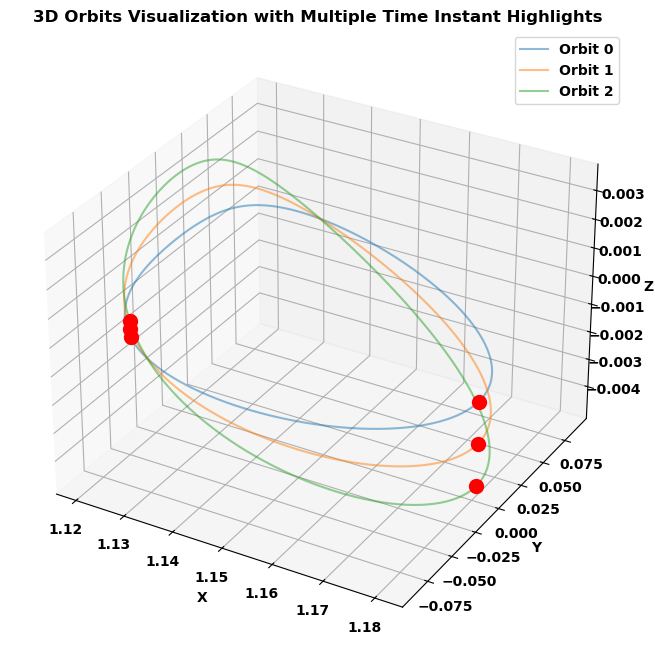

In [32]:
visualize_orbits_with_multiple_time_instants_highlighted(data= mat_data,time_instants=[0,100], orbit_indices=[0,1,2], show_legend=True)

In [36]:
example.shape

(5, 6, 7500)

In [38]:
visualize_orbits_with_multiple_time_instants_highlighted(data= example,time_instants=[0], show_legend=True)

KeyboardInterrupt: 

In [ ]:
visualize_dynamic_orbits_html(data=data, point_dict= points_to_add)